In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [7]:
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [8]:
# Reflect an existing database into a new model

# Declare a Base
Base = automap_base()

# Use the Base to reflect the database tables
Base.prepare(engine, reflect = True)

In [9]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
measurement_table = Base.classes.measurement

station_table = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [12]:
# Get the Latest date in the table
lastDate = session.query(measurement_table.date).order_by(measurement_table.date.desc()).first()
lastDate

('2017-08-23')

In [64]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
# Hold session query in a variable for easier reading
lastYear = session.query(measurement_table.date, measurement_table.prcp).\
                filter(measurement_table.date >= (dt.date(2017, 8, 23) - dt.timedelta(weeks = 52))).\
                order_by(measurement_table.date).all()

# Variable to hold current date and total precipitation in the loop
currentDate = ""
totalPrecipitation = 0
count = 0

# Lists to hold the values for date and precipation
date = []
precipitation = []

# Perform a query to retrieve the data and precipitation scores
for row in lastYear:
    # Initialize the currentDate variable as the first isntance of row
    if currentDate == "":
        currentDate = row[0]
    
    # Check if the current row has the same date; if so, add the prcp value to totalPrecipitation
    if currentDate == row[0]:
        # Ignore None values for addition
        if row[1] is not None:
            totalPrecipitation = round(totalPrecipitation + float(row[1]),2)
        count += 1
    # Check if the current row has a new date; if so, add values to lists and reset values for the loop
    else:
        # Add the currentDate and avg precipation to their respective lists
        date.append(currentDate)
        precipitation.append(totalPrecipitation / count)
        # Update the current date and reset totalPrecipiation and count
        currentDate = row[0]
        totalPrecipitation = 0
        count = 0
        
# Save the query results as a Pandas DataFrame
precipitation_df = pd.DataFrame(
        { 
            "Date" : date,
            "Precipitation" : precipitation
        })

# Set the Index to date column
precipitation_df = precipitation_df.set_index("Date")
precipitation_df.head()

,Precipitation
Date,
2016-08-24,1.332857
2016-08-25,0.076667
2016-08-26,0.020000
2016-08-27,0.064000
2016-08-28,0.618000


In [76]:
# Create labels
labels = ["2016-08-24", "2016-10-01", "2016-11-09", "2016-12-19", "2017-03-09", "2017-04-18", "2017-05-31", "2017-07-10"]

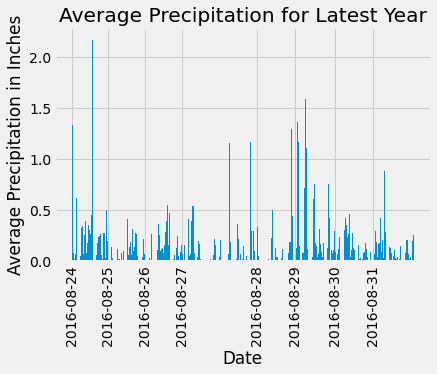

In [101]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure()
plt.bar(precipitation_df.index, precipitation_df["Precipitation"], align = "center")

#Format the Plot
plt.xticks(labels, precipitation_df.index, rotation = "vertical")
plt.xlabel("Date")
plt.ylabel("Average Precipitation in Inches")
plt.title("Average Precipitation for Latest Year")


#Save the graph to Images Folder
plt.savefig("../")

#Output the Plot
plt.show()


In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [ ]:
# Design a query to show how many stations are available in this dataset?


In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
